# Wine Classification

The goal of this notebook is to correctly classify wines in the famous Wine Dataset from scikit learn. For this, we will use the following models : KNN, DT, SVM

# Summary

* [1. Dataset Exploration](#1)
    * [1.1 Summary Statistics](#1.1)
    * [1.2 Target Classes](#1.2)
    * [1.3 Summary Statistics](#1.3)
    * [1.4 Feature Distribution](#1.4)
    * [1.5 Correlation heatmap and pairplots](#1.5)
    * [1.6 Standardization](#1.6)
    * [1.7 Feature Selection](#1.7)
  
* [2. Model Testing](#2)
    * [2.1 Logistic Regression](#2.1)
    * [2.2 KNN](#2.2)
    * [2.3 Decision Trees](#2.3)
    * [2.4 Support Vectore Machines](#2.4)
    * [2.5 Comparison and Conslusion](#2.5)


In [1]:
from sklearn.datasets import load_wine
import pandas as pd

In [2]:
wine = load_wine()

<a id='1'></a>
# <u> 1. Dataset Exploration

<a id='1.1'></a>
## <u> 1.1 Features

In [3]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

<b><u>Comments:</b></u> 
- We have the names of our features + the differentiation in 3 classes here for the target.
- We also have mean and std of our 13 features (none of them follows a Normal distrib, as we do not see any mean=0 and std = 1).
- We already observe that there are no missing attribute values.

In [4]:
X = pd.DataFrame(wine.data)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       178 non-null    float64
 1   1       178 non-null    float64
 2   2       178 non-null    float64
 3   3       178 non-null    float64
 4   4       178 non-null    float64
 5   5       178 non-null    float64
 6   6       178 non-null    float64
 7   7       178 non-null    float64
 8   8       178 non-null    float64
 9   9       178 non-null    float64
 10  10      178 non-null    float64
 11  11      178 non-null    float64
 12  12      178 non-null    float64
dtypes: float64(13)
memory usage: 18.2 KB


In [5]:
X.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

Fortunately, there are no missing values in our dataset.

In [6]:
X.shape

(178, 13)

In [7]:
wine.feature_names # we get the features names and we will replace it in the column names thereafter

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [8]:
X.columns = ['Alcohol','Malic Acid','Ash','Alcalinity of Ash','Magnesium', 'Total Phenols', 'Flavanoids', 'Nonflavanoid Phenols',
            'Proanthocyanins', 'Color Intensity', 'Hue', 'Od280/Od315', 'Proline']

In [9]:
X.head()

,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,Od280/Od315,Proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [10]:
summary = X.describe()
print(summary)

          Alcohol  Malic Acid         Ash  Alcalinity of Ash   Magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       Total Phenols  Flavanoids  Nonflavanoid Phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.9

<b><u>Comments:</b></u>
- Data is not standardized for the moment so we will need to do so thereafter.
- It is quite difficult to compare the different features for the moment.

**3. Focus on labels (Target classes)**

<a id='1.2'></a>
## <u> 1.2 Target Classes

In [11]:
y = wine.target

In [12]:
print(wine.target_names)

['class_0' 'class_1' 'class_2']


In [13]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [14]:
y_1 = pd.Series(wine.target)
y_1.value_counts()

1    71
0    59
2    48
Name: count, dtype: int64

<b><u>Comments:</b></u>
- We have three different classes of wine here, quite proportionnal in terms of count even if Class 1 is bigger than the two others.

<a id='1.3'></a>
## <u> 1.3 Summary Statistics

In [15]:
selected_features = X[['Alcohol', 'Malic Acid', 'Ash', 'Magnesium']]
summary_stats = pd.DataFrame({
    "mean": selected_features.mean(),
    "median": selected_features.median(),
    "std": selected_features.std()
})
summary_stats

,mean,median,std
Alcohol,13.000618,13.050,0.811827
Malic Acid,2.336348,1.865,1.117146
Ash,2.366517,2.360,0.274344
Magnesium,99.741573,98.000,14.282484


<b><u>Comments:</b></u> 
- It is still quite complicated to compare (standarization is totally needed here). 
- We observe a large standard deviation for Magnesium compared to the others, which is totally normal as the order of magnitude is not the same here.
- In all those cases median and mean are quite similar.

<a id='1.4'></a>
## <u> 1.4 Feature Distribution

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

array([[<Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'Malic Acid'}>]], dtype=object)

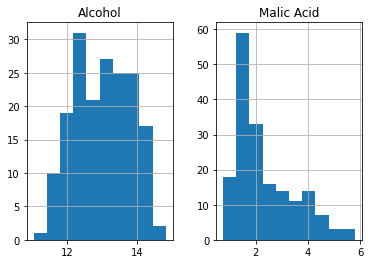

In [17]:
X[['Alcohol', 'Malic Acid']].hist()

<b><u>Comments:</b></u>
- Alcohol has a more centered distribution, most of the values being between 12 and 14.
- Malic Acid is more skewed to the left, most of the values beign between 0 and 2.
- Both have some outliers (11 or 15 for Alcohol for instance or 6 for Malic Acid).

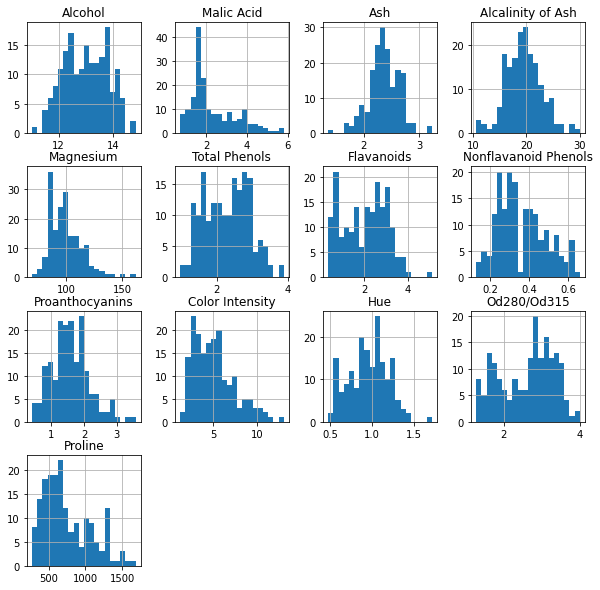

In [18]:
X.hist(bins=20, figsize=(10, 10))
plt.show()

<b><u>Comments on data distribution:</b></u>
- Alcohol, Alcalinity of Ash, Total Phenols, Proanthocyanins and Hue are quite centered.
- The other features are mostly left-skewed.

**5. Correlation Matrix: relationship between features**

<a id='1.5'></a>
## <u> 1.5 Correlation heatmap and pairplots 

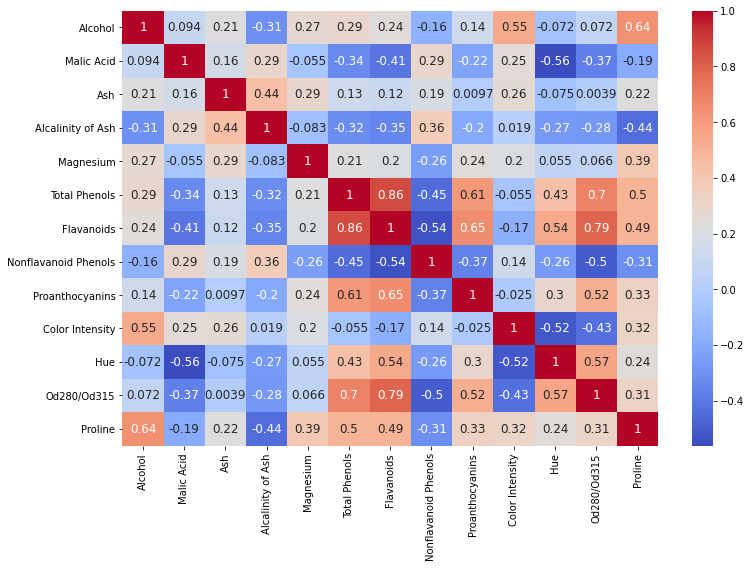

In [19]:
import seaborn as sns
corr = X.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', annot_kws={"size": 12})
plt.show()

<b><u>What do we see here ?</b></u> 
- A strong positive correlation between Flavanoids and Total Phenols and between Falvanoids and Od280/Od315. So maybe we can drop some of them later.
- A strong negative correlation between Hue and Malic Acid and between NonFlavanoid Phenols and Flavanoids.
- A correlation between Alcohol and Color Intensity, which at first sight might be interesting features to classify wine classes.

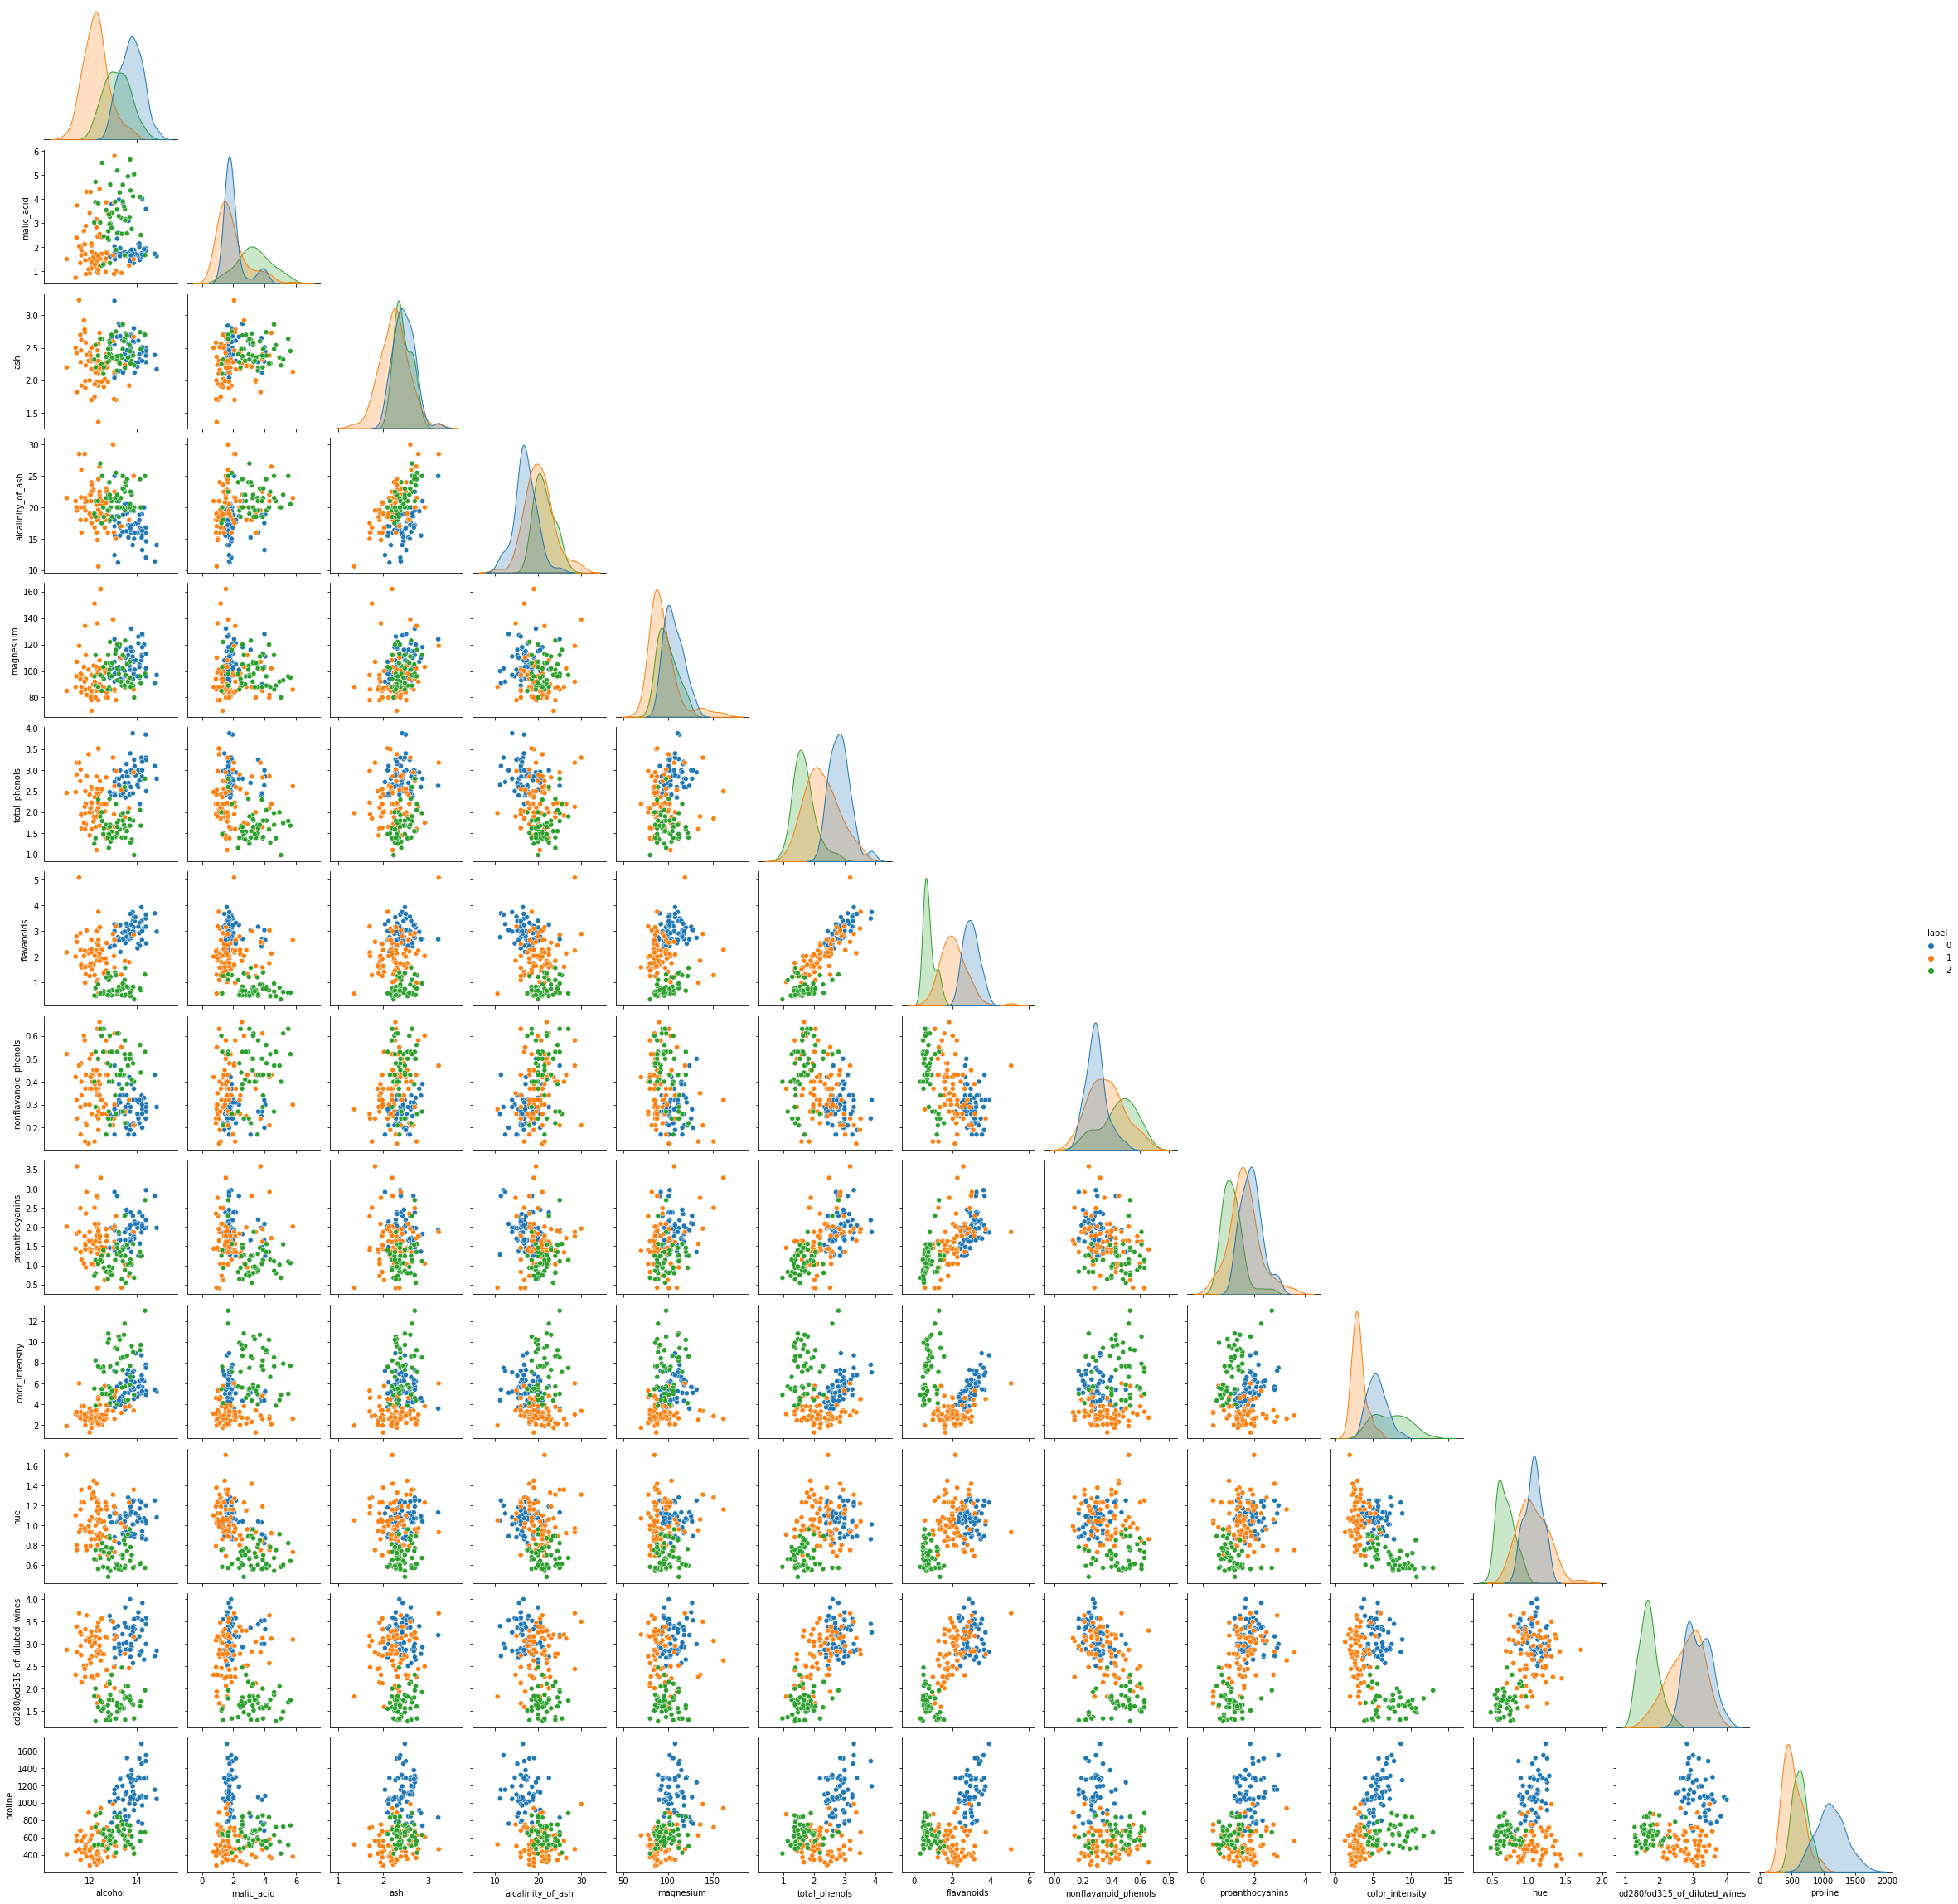

In [20]:
X_1 = pd.DataFrame(wine.data, columns=wine.feature_names)
X_1['label'] = wine.target
sns.pairplot(X_1, 
             hue='label', 
             palette="tab10", 
             corner=True)

plt.show()

<b><u>Comments:</b></u>
From those scatter plots we observe that it is quite difficult to differentiate the distrib of Class 0, Class 1 and Class 2 for:
- Ash
- Magnesium
- Proanthocyanins

We should consider this later when we will be dropping some features.

<a id='1.6'></a>
## <u> 1.6 Standardization

In [21]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

In [22]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.head()

,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,Od280/Od315,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


<a id='1.7'></a>
## <u> 1.7 Feature Selection

<b><u>Comments on selection:</b></u>
- We want to avoid overfitting so we must drop some features at this point. 
- We will drop a feature thanks to the correlation matrix: Total Phenols that was positively correlated to Flavanoids.
- We also drop Ash, Magnesium and Proanthocyanins with respect to the scatter plots.

In [23]:
columns_to_drop = ['Total Phenols','Ash','Magnesium','Proanthocyanins']
X_scaled_df = X_scaled_df.drop(columns=columns_to_drop)
X_scaled_df.head()

,Alcohol,Malic Acid,Alcalinity of Ash,Flavanoids,Nonflavanoid Phenols,Color Intensity,Hue,Od280/Od315,Proline
0,1.518613,-0.562250,-1.169593,1.034819,-0.659563,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-2.490847,0.733629,-0.820719,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,-0.268738,1.215533,-0.498407,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,-0.809251,1.466525,-0.981875,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,0.451946,0.663351,0.226796,-0.319276,0.362177,0.449601,-0.037874


These are the features we are now interested in (& Standardized). We will now split the dataset and proceed to the different models.

<a id='2'></a>
# <u> 2. Model Testing

Here is our process : 
* Perform a grid search on the hyperparameters in order to fine tune the models.
    * Each grid search is going to be performed with the K-Folds method to ensure correct accuracy metrics (we chose K = 5).
    * For the logistic regression we will add a part for the confusion matrix and F1-score as per the assignment.
* Then we are going to test them on the test set and compare them with the usual metrics (F1 score, accuracy).
    * Note that we are storing all of the test results in a dictionary and we print it at the end for better readability.

In [24]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df,y,test_size=0.2,random_state=1278,stratify=y)
# -> stratify here allows us to have the same proportion of the three classes of wine both in the training and the test samples.

In [25]:
# We can check if it is well stratified here: 
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

print("Train class repartition:")
print(y_train_series.value_counts(normalize=True))

print("Test class repartition:")
print(y_test_series.value_counts(normalize=True))

Train class repartition:
1    0.401408
0    0.330986
2    0.267606
Name: proportion, dtype: float64
Test class repartition:
1    0.388889
0    0.333333
2    0.277778
Name: proportion, dtype: float64


<a id='2.1'></a>
## <u> 2.1 Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
log_reg = LogisticRegression(random_state = 1278, max_iter=100, solver = 'liblinear')

In [27]:
# Looking for regularisation: L1 (Lasso) or L2 (Ridge) type ?
# C is usually choosen equal to 1 but we chose to grid search on it.
from sklearn.model_selection import GridSearchCV
param_regul = {'C': [0.01, 0.1, 1, 10, 100],'penalty': ['l1', 'l2']}
grid_search = GridSearchCV(log_reg, param_regul, scoring='accuracy',verbose = 2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .................................C=0.01, penalty=l1; total time=   0.0s
[CV] END .................................C=0.01, penalty=l1; total time=   0.0s
[CV] END .................................C=0.01, penalty=l1; total time=   0.0s
[CV] END .................................C=0.01, penalty=l1; total time=   0.0s
[CV] END .................................C=0.01, penalty=l1; total time=   0.0s
[CV] END .................................C=0.01, penalty=l2; total time=   0.0s
[CV] END .................................C=0.01, penalty=l2; total time=   0.0s
[CV] END .................................C=0.01, penalty=l2; total time=   0.0s
[CV] END .................................C=0.01, penalty=l2; total time=   0.0s
[CV] END .................................C=0.01, penalty=l2; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l1; total time=   0.0s
[CV] END ..................................C=0.1

GridSearchCV(estimator=LogisticRegression(random_state=1278,
                                          solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=2)

In [28]:
# Now we look for the best C & the best regularisation method: 
best_C = grid_search.best_params_['C']
best_penalty = grid_search.best_params_['penalty']

print(f'Optimal value of C: {best_C}')
print(f'Best Regularization Type: {best_penalty}')

Optimal value of C: 0.1
Best Regularization Type: l2


<b><u>Comments:</b></u>
- The best value of C here (among the selection of order of magnitude we have made) is 0.1.
- The best regularization method in this case is the Ridge one.

Following will be the metrics and confusion matrix for the logistic regression model :

In [29]:
best_model = grid_search.best_estimator_
# -->The best_estimator_ method returns to us the model with the optimally tuned parameters.
y_pred = best_model.predict(X_test)

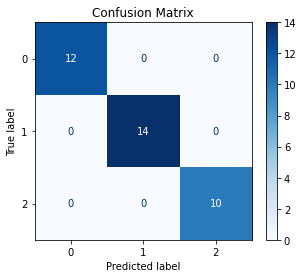

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
fig, ax = plt.subplots(figsize=(5, 4))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix')
plt.show()

print('Accuracy:', acc)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)


In [31]:
# We store all these results into a dictionnary. That will be helpful to display which model is the best at th end.
results = {}
results['Logistic Regression'] = {
    'accuracy': acc,
    'confusion_matrix': cm,
    'precision': precision,
    'recall': recall,
    'f1_score': f1}

<a id='2.2'></a>
## <u> 2.2 KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15, 20],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean']
}

knn_model = KNeighborsClassifier()

grid_search_knn = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy', verbose=2)

grid_search_knn.fit(X_train, y_train)

best_params_knn = grid_search_knn.best_params_
best_knn_model = grid_search_knn.best_estimator_

print("Best Parameters for KNN:", best_params_knn)

knn_pred = best_knn_model.predict(X_test)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=5, wei

In [33]:
results['KNN'] = {
    'accuracy': accuracy_score(y_test, knn_pred),
    'confusion_matrix': confusion_matrix(y_test, knn_pred),
    'precision': precision_score(y_test, knn_pred, average='weighted'),
    'recall': recall_score(y_test, knn_pred, average='weighted'),
    'f1_score': f1_score(y_test, knn_pred, average='weighted')
}

<a id='2.3'></a>
## <u> 2.3 Decision Trees

In [34]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'max_depth': [1, 2, 3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dt_model = DecisionTreeClassifier(random_state=234)

grid_search_dt = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy', verbose=2)

grid_search_dt.fit(X_train, y_train)

best_params_dt = grid_search_dt.best_params_
best_dt_model = grid_search_dt.best_estimator_

print("Best Parameters for Decision Tree:", best_params_dt)
dt_pred = best_dt_model.predict(X_test)

Fitting 5 folds for each of 126 candidates, totalling 630 fits
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=

[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END criteri

[CV] END criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END criter

[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=10; total ti

[CV] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=10; total 

[CV] END criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=5; total t

[CV] END criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, min_samples_lea

In [35]:
results['Decision Tree'] = {
    'accuracy': accuracy_score(y_test, dt_pred),
    'confusion_matrix': confusion_matrix(y_test, dt_pred),
    'precision': precision_score(y_test, dt_pred, average='weighted'),
    'recall': recall_score(y_test, dt_pred, average='weighted'),
    'f1_score': f1_score(y_test, dt_pred, average='weighted')
}

<a id='2.4'></a>
## <u> 2.4 Support Vector Models (SVM)

In [36]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1, 10, 100],'gamma': [0.000001, 0.0001, 0.001, 0.01, 0.1, 1],'kernel': ['linear', 'rbf', 'sigmoid']}

svm_model = SVC()
grid_search_svm = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search_svm.fit(X_train, y_train)

best_params = grid_search_svm.best_params_
best_svm_model = grid_search_svm.best_estimator_

print("Best Parameters for SVM:", best_params)
svm_pred = best_svm_model.predict(X_test)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV] END .................C=0.01, gamma=1e-06, kernel=linear; total time=   0.0s
[CV] END .................C=0.01, gamma=1e-06, kernel=linear; total time=   0.0s
[CV] END .................C=0.01, gamma=1e-06, kernel=linear; total time=   0.0s
[CV] END .................C=0.01, gamma=1e-06, kernel=linear; total time=   0.0s
[CV] END .................C=0.01, gamma=1e-06, kernel=linear; total time=   0.0s
[CV] END ....................C=0.01, gamma=1e-06, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.01, gamma=1e-06, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.01, gamma=1e-06, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.01, gamma=1e-06, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.01, gamma=1e-06, kernel=rbf; total time=   0.0s
[CV] END ................C=0.01, gamma=1e-06, kernel=sigmoid; total time=   0.0s
[CV] END ................C=0.01, gamma=1e-06, k

[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................

[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=10, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=10, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=10, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...................

In [37]:
results['SVM'] = {
    'accuracy': accuracy_score(y_test, svm_pred),
    'confusion_matrix': confusion_matrix(y_test, svm_pred),
    'precision': precision_score(y_test, svm_pred, average='weighted'),
    'recall': recall_score(y_test, svm_pred, average='weighted'),
    'f1_score': f1_score(y_test, svm_pred, average='weighted')
}

<a id='2.5'></a>
## <u> 2.5 Comparison and Conslusion 


Logistic Regression Model Performance:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


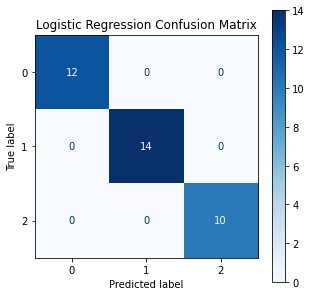


KNN Model Performance:
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 Score: 0.97


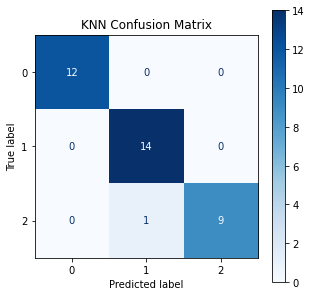


Decision Tree Model Performance:
Accuracy: 0.92
Precision: 0.93
Recall: 0.92
F1 Score: 0.92


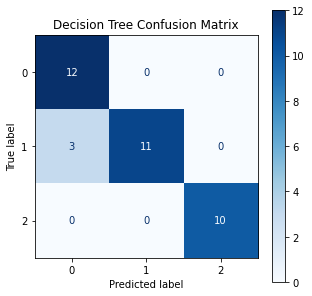


SVM Model Performance:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


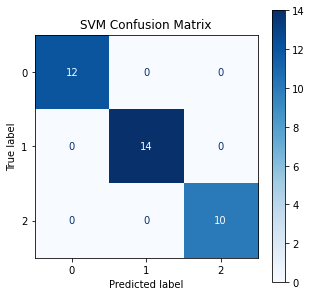

In [38]:
for model, metrics in results.items():
    print(f'\n{model} Model Performance:')
    print(f'Accuracy: {metrics["accuracy"]:.2f}')
    print(f'Precision: {metrics["precision"]:.2f}')
    print(f'Recall: {metrics["recall"]:.2f}')
    print(f'F1 Score: {metrics["f1_score"]:.2f}')
    
    fig, ax = plt.subplots(figsize=(5,5))
    disp = ConfusionMatrixDisplay(confusion_matrix=metrics['confusion_matrix'])
    disp.plot(cmap=plt.cm.Blues, ax=ax)
    plt.title(f'{model} Confusion Matrix')
    plt.show()

<u> Conclusions : </u>
- SVM model & Logistic Regression offer us a perfect F1-Score here.

<u> Limits : </u>

- Remember that we made some assumptions and dropped some features that we chose based on the scatterplots and positive correlations. There is an argument to make that keeping/dropping other variables would give us different results. The choice to drop features is guided but somewhat arbitrary.
- Also note that our models can suffer from overfitting to some extent due to the 80/20 split that we chose and the limited number of datapoints in our dataset.